# 1) Delivery_time -> Predict delivery time using sorting time 

In [27]:
import pandas as pd
import seaborn as sns
import statsmodels.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np

In [7]:
data = pd.read_csv("delivery_time.csv")

In [8]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [9]:
#In Linear Regression, first we need to check whether the data is correlated or not

data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


If the value is near to 1, there is correlation. Here this is a positive correlated data (83%), so we can apply Linear Regression.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

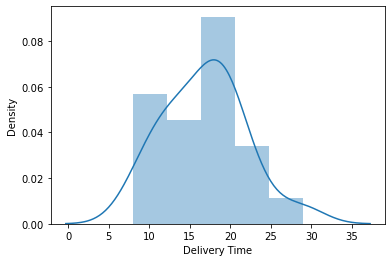

In [10]:
sns.distplot(data['Delivery Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

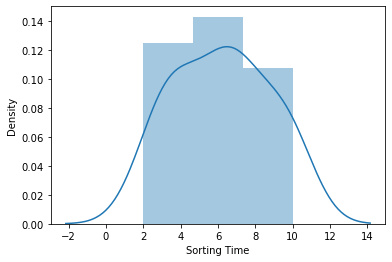

In [11]:
sns.distplot(data['Sorting Time'])

This is a normal data.

# No Transormation

In [35]:
x=data["Sorting Time"]
y=data["Delivery Time"]

In [36]:
#Fitting LR Model.


model = smf.OLS(y,x).fit()
predictions = model.predict(x)
predictions

0     25.652463
1     10.260985
2     15.391478
3     23.087216
4     25.652463
5     15.391478
6     17.956724
7      7.695739
8     25.652463
9     23.087216
10    20.521970
11    10.260985
12    17.956724
13     7.695739
14     7.695739
15    10.260985
16    15.391478
17    17.956724
18     5.130493
19    17.956724
20    12.826231
dtype: float64

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                    6.12e-15
Time:                        14:23:07   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

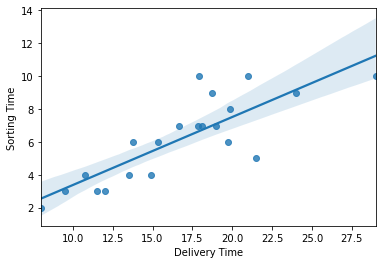

In [38]:
sns.regplot(x="Delivery Time", y="Sorting Time", data = data)

This is the visualization of best fit line

In [39]:
model.params

Sorting Time    2.565246
dtype: float64

In [40]:
model.tvalues

Sorting Time    20.603344
dtype: float64

In [41]:
model.pvalues

Sorting Time    6.118908e-15
dtype: float64

In [42]:
(model.rsquared, model.rsquared_adj)

(0.955005401256664, 0.9527556713194972)

# Log Transformation

In [43]:
x_log = np.log(x)
y_log = np.log(y)

In [46]:
model2 = smf.OLS(y_log,x_log).fit()
predictions2 = model2.predict(x_log)
predictions

0     25.652463
1     10.260985
2     15.391478
3     23.087216
4     25.652463
5     15.391478
6     17.956724
7      7.695739
8     25.652463
9     23.087216
10    20.521970
11    10.260985
12    17.956724
13     7.695739
14     7.695739
15    10.260985
16    15.391478
17    17.956724
18     5.130493
19    17.956724
20    12.826231
dtype: float64

In [54]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                    5.72e-17
Time:                        14:27:23   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model2.params

Sorting Time    1.539575
dtype: float64

In [51]:
model2.tvalues

Sorting Time    26.243501
dtype: float64

In [52]:
model2.pvalues

Sorting Time    5.717261e-17
dtype: float64

In [53]:
(model2.rsquared,model2.rsquared_adj)

(0.9717801632741209, 0.9703691714378269)

# Square Root Tranformation

In [55]:
x_sqr = np.sqrt(x)
y_sqr = np.sqrt(y)

In [57]:
model3 = smf.OLS(y_sqr,x_sqr).fit()
predictions3 = model3.predict(x_sqr)
predictions3

0     5.174604
1     3.272707
2     4.008231
3     4.909060
4     5.174604
5     4.008231
6     4.329384
7     2.834247
8     5.174604
9     4.909060
10    4.628306
11    3.272707
12    4.329384
13    2.834247
14    2.834247
15    3.272707
16    4.008231
17    4.329384
18    2.314153
19    4.329384
20    3.658997
dtype: float64

In [58]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                    2.10e-20
Time:                        14:29:29   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model3.params

Sorting Time    1.636353
dtype: float64

In [60]:
model3.tvalues

Sorting Time    39.266721
dtype: float64

In [61]:
model3.pvalues

Sorting Time    2.100766e-20
dtype: float64

In [62]:
(model3.rsquared,model3.rsquared_adj)

(0.9871948808975024, 0.9865546249423776)

# Output Interpretation

 
We will use Model3 as it has the best R square value

1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == 1.64
Thus if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.64

3 - Adj. R-sqared == 0.987
Thus the model explains 98.7% of the variance in dependent variable

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [64]:
sal = pd.read_csv("Salary_Data.csv")

In [65]:
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [66]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


If the value is near to 1, there is correlation. Here this is a positive correlated data (97%), so we can apply Linear Regression.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

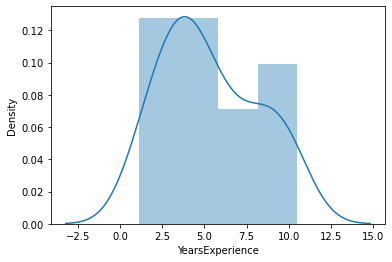

In [68]:
sns.distplot(sal['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

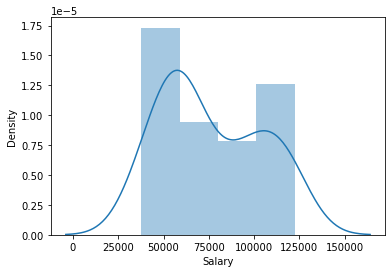

In [69]:
sns.distplot(sal['Salary'])

In [70]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Positively correlated data

# No Transformation

In [71]:
x=sal["YearsExperience"]
y=sal["Salary"]

In [74]:
model1 = smf.OLS(y,x).fit()
pred1 = model1.predict(x)
pred1

0      14580.432300
1      17231.419991
2      19882.407682
3      26509.876909
4      29160.864600
5      38439.321518
6      39764.815363
7      42415.803054
8      42415.803054
9      49043.272281
10     51694.259972
11     53019.753818
12     53019.753818
13     54345.247663
14     59647.223045
15     64949.198427
16     67600.186118
17     70251.173808
18     78204.136881
19     79529.630727
20     90133.581490
21     94110.063026
22    104714.013790
23    108690.495326
24    115317.964553
25    119294.446090
26    125921.915317
27    127247.409162
28    136525.866081
29    139176.853771
dtype: float64

In [76]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                    2.56e-24
Time:                        17:17:50   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

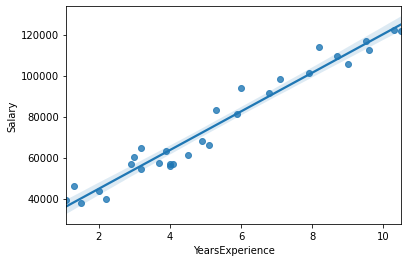

In [81]:
sns.regplot(x=x,y=y,data=data)

In [77]:
model1.params

YearsExperience    13254.938454
dtype: float64

In [78]:
model1.tvalues

YearsExperience    32.376429
dtype: float64

In [79]:
model1.pvalues

YearsExperience    2.563404e-24
dtype: float64

In [80]:
(model1.rsquared,model1.rsquared_adj)

(0.9730791806609133, 0.9721508765457724)

# Log Transformation

In [82]:
x_log = np.log(x)
y_log=np.log(y)

In [83]:
model2 = smf.OLS(y_log,x_log).fit()
pred2 = model2.predict(x_log)
pred2

0      0.614381
1      1.691232
2      2.613677
3      4.468110
4      5.082491
5      6.863254
6      7.081787
7      7.497810
8      7.497810
9      8.433671
10     8.773019
11     8.936220
12     8.936220
13     9.095392
14     9.695464
15    10.244402
16    10.502281
17    10.750239
18    11.441557
19    11.549897
20    12.356714
21    12.635007
22    13.323246
23    13.563502
24    13.945041
25    14.163574
26    14.512098
27    14.579597
28    15.033280
29    15.157248
dtype: float64

In [84]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                    8.60e-15
Time:                        17:24:55   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
model2.params

YearsExperience    6.44612
dtype: float64

In [86]:
model2.tvalues

YearsExperience    14.460723
dtype: float64

In [87]:
model2.pvalues

YearsExperience    8.604094e-15
dtype: float64

In [88]:
(model2.rsquared,model2.rsquared_adj)

(0.8782088280013777, 0.8740091324152183)

# Square Root Transformation

In [90]:
x_sqr = np.sqrt(x)
y_sqr = np.sqrt(y)

In [92]:
model3 = smf.OLS(y_sqr,x_sqr).fit()
pred3 = model3.predict(x_sqr)
pred3

0     124.666906
1     135.527215
2     145.579582
3     168.100822
4     176.305629
5     202.420194
6     205.880619
7     212.632589
8     212.632589
9     228.641837
10    234.740023
11    237.730462
12    237.730462
13    240.683749
14    252.151233
15    263.119405
16    268.435486
17    273.648312
18    288.722643
19    291.159164
20    309.962600
21    316.726216
22    334.093775
23    340.378221
24    350.602061
25    356.595693
26    366.367247
27    368.290448
28    381.481473
29    385.167370
dtype: float64

In [93]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                    2.81e-29
Time:                        17:27:43   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model3.params

YearsExperience    118.865231
dtype: float64

In [95]:
model3.tvalues

YearsExperience    48.351757
dtype: float64

In [96]:
model3.pvalues

YearsExperience    2.809853e-29
dtype: float64

In [97]:
(model3.rsquared,model3.rsquared_adj)

(0.9877476477055663, 0.9873251527988617)

# Output Interpretation

We will use model3 as it has the best R square value

1. p-value <0.01

The model is accepted.

2. coefficient = 118.86

if year of experience is increased by 1, then the predicted value of salary will increase by 118.86

3. r_squared_adj = 98.7%

The models describes 98.7% of the variancein dependent variable.